# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning - Optional:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [44]:
import pandas as pd

In [45]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
14564   59           Private   69884   Prof-school             15   
27818   32           Private  158002  Some-college             10   
1408    37           Private  143912       HS-grad              9   
31119   28           Private  273269  Some-college             10   
27156   34  Self-emp-not-inc  204052       HS-grad              9   
29877   49  Self-emp-not-inc   48495       HS-grad              9   
16065   23                 ?  154921       5th-6th              3   
10682   27         Local-gov  331046     Bachelors             13   
18279   72           Private  183616       HS-grad              9   
24465   42           Private  187720       Masters             14   

              marital-status         occupation    relationship   race  \
14564  Married-spouse-absent     Prof-specialty       Unmarried  White   
27818          Never-married  Machine-op-inspct  Other-relative  White   
1408                Divorced   Transport-moving   Not-in-family  White   
31119          Never-married       Craft-repair   Not-in-family  Black   
27156     Married-civ-spouse       Craft-repair         Husband  White   
29877     Married-civ-spouse    Exec-managerial         Husband  White   
16065          Never-married                  ?   Not-in-family  White   
10682          Never-married     Prof-specialty   Not-in-family  White   
18279     Married-civ-spouse    Exec-managerial            Wife  White   
24465     Married-civ-spouse              Sales         Husband  White   

          sex  capital-gain  capital-loss  hours-per-week native-country  \
14564    Male             0             0              50  United-States   
27818    Male             0             0              55        Ecuador   
1408     Male             0             0              50  United-States   
31119    Male             0             0              40  United-States   
27156    Male             0             0              40  United-States   
29877    Male             0             0              45  United-States   
16065    Male             0             0              50  United-States   
10682  Female             0             0              45  United-States   
18279  Female             0             0              50        England   
24465    Male         15024             0              50              ?   

      income  
14564  <=50K  
27818  <=50K  
1408   <=50K  
31119  <=50K  
27156   >50K  
29877  <=50K  
16065  <=50K  
10682  <=50K  
18279  <=50K  
24465   >50K

####    Data Preparation

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Model selection

In [47]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "SGDRegressor": SGDRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "RidgeRegression": Ridge(random_state=42),
    "LassoRegression": Lasso(random_state=42)
}

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    results[name] = evaluate_model(y_val, y_val_pred)

results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                            MAE         MSE       RMSE        R2
SGDRegressor           7.575981  113.803572  10.667876  0.192940
LinearRegression       7.575806  113.795849  10.667514  0.192995
DecisionTreeRegressor  9.776220  204.472051  14.299372 -0.450053
RandomForestRegressor  7.444246  110.346068  10.504574  0.217459
RidgeRegression        7.575522  113.779237  10.666735  0.193112
LassoRegression        7.353181  134.258677  11.587005  0.047879


Rezultatele evaluării diferitelor modele de regresie, precum SGDRegressor, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, RidgeRegression și LassoRegression, indică faptul că RandomForestRegressor este modelul cu cele mai bune performanțe, având cele mai mici valori pentru MAE (7.444246) și RMSE (10.504574), precum și cel mai mare R2 (0.217459). DecisionTreeRegressor a performat cel mai slab, cu cele mai mari valori pentru MAE și RMSE și un R2 negativ (-0.450053). Modelele LinearRegression, SGDRegressor și RidgeRegression au avut performanțe similare, cu valori aproape identice pentru toate cele patru metrici, în timp ce LassoRegression a avut o performanță ușor mai slabă. Aceste rezultate sugerează că RandomForestRegressor este cel mai potrivit model pentru predicția orelor lucrate pe săptămână în acest context.

In [48]:
correlation_with_target = X_train.corrwith(y_train["hours-per-week"].squeeze())
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

#### EXPERIMENTATION

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [0.0001, 0.001, 0.01],
    "max_iter": [1000, 2000],
    "learning_rate": ["constant", "adaptive"]
}

grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train_poly, y_train["hours-per-week"])

print(grid_search.best_params_)

{'alpha': 0.001, 'learning_rate': 'adaptive', 'max_iter': 1000}


#### MODEL EVALUATION

In [51]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_poly, y_train["hours-per-week"])

y_test_pred = best_model.predict(X_test_poly)
test_results = evaluate_model(y_test["hours-per-week"], y_test_pred)
print(test_results)

{'MAE': 7.587931182210467, 'MSE': 118.23594397429316, 'RMSE': np.float64(10.873635269508222), 'R2': 0.17021797306814224}


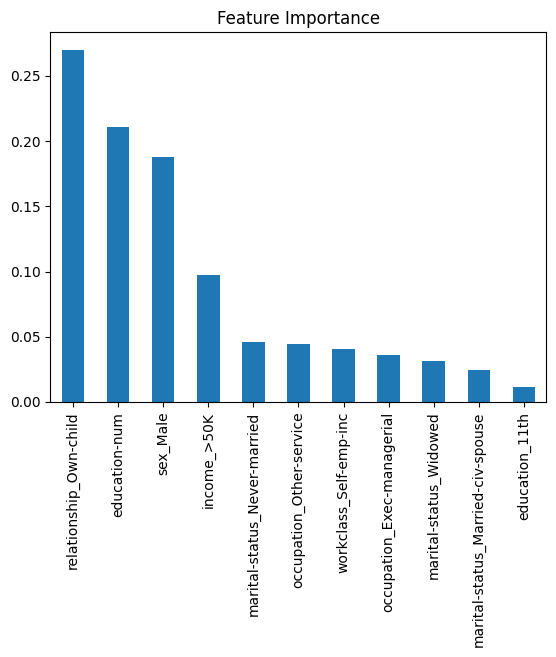

In [52]:
import matplotlib.pyplot as plt

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train["hours-per-week"])

importances = pd.Series(rf.feature_importances_, index=X_train_selected.columns)
importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance")
plt.show()

Graficul prezintă importanța caracteristicilor pentru un model RandomForestRegressor care prezice "hours-per-week". Pe axa Y sunt listate caracteristicile, iar pe axa X sunt afișate valorile de importanță corespunzătoare fiecărei caracteristici. Cele mai importante caracteristici sunt "relationship_own-child", "education-num" și "sex_Male", sugerând că acestea au cel mai mare impact asupra predicțiilor modelului. Alte caracteristici, cum ar fi "income_>50K" și "marital-status_Never-married", au o importanță mai mică, dar contribuie totuși la performanța modelului. Acest grafic oferă o perspectivă asupra factorilor care influențează cel mai mult numărul de ore lucrate pe săptămână.